In [3]:
## Build a simple workflow using Langgraph

from typing_extensions import TypedDict
class State(TypedDict):
     graph_info:str

In [5]:
def start_play(state:State):
        print("Start_Play node has been called")
        return {"graph_info":state['graph_info'] + " I am planning to play"}

def cricket(state:State):
        print("My Cricket node has been called")
        return {"graph_info":state['graph_info'] + " Cricket"}
    
def badminton(state:State):
        print("My badminton node has been called")
        return {"graph_info":state['graph_info'] + " Badminton"}

In [6]:
import random
from typing import Literal

def random_play(state: State) -> Literal['cricket', 'badminton']:
    graph_info = state['graph_info']
    if random.random() > 0.5:
        return "cricket"
    else:
        return "badminton"

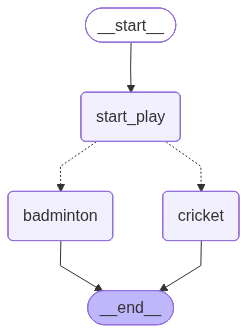

In [7]:
from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END

## Build Graph
graph=StateGraph(State)
## Adding the nodes
graph.add_node("start_play",start_play)
graph.add_node("cricket",cricket)
graph.add_node("badminton",badminton)

## Schedule the flow of the graph
graph.add_edge(START,"start_play")
graph.add_conditional_edges("start_play",random_play)
graph.add_edge("cricket",END)
graph.add_edge("badminton",END)
               
## Compile the graph
graph_builder=graph.compile()
## View
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [10]:
graph_builder.invoke({"graph_info":"My name is Sowmya"})

Start_Play node has been called
My badminton node has been called


{'graph_info': 'My name is Sowmya I am planning to play Badminton'}